In [54]:
import sys
print(sys.version)
# TF2.xの読み込み
import tensorflow as tf
# バージョンの確認
print('TensorFlow version: {}'.format(tf.__version__))


3.6.10 |Anaconda, Inc.| (default, May  7 2020, 19:46:08) [MSC v.1916 64 bit (AMD64)]
TensorFlow version: 2.1.0


In [72]:
import os
os.environ['PATH']=r'C:\Users\kazuk\anaconda3\envs\tensorflow36_conda;C:\Users\kazuk\anaconda3\envs\tensorflow36_conda\Library\mingw-w64\bin;C:\Users\kazuk\anaconda3\envs\tensorflow36_conda\Library\usr\bin;C:\Users\kazuk\anaconda3\envs\tensorflow36_conda\Library\bin;C:\Users\kazuk\anaconda3\envs\tensorflow36_conda\Scripts;C:\Users\kazuk\anaconda3\envs\tensorflow36_conda\bin;C:\Users\kazuk\anaconda3\condabin;C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\System32\Wbem;C:\WINDOWS\System32\WindowsPowerShell\v1.0;C:\WINDOWS\System32\OpenSSH;C:\Program Files\Git\cmd;C:\gcloud\google-cloud-sdk\bin;C:\MinGW\bin\gcc.exe;C:\Windows\py.exe;C:\Program Files (x86)\Intel\Intel(R) Management Engine Components\DAL;C:\Program Files\Intel\Intel(R) Management Engine Components\DAL;C:\Program Files\Microsoft SQL Server\120\Tools\Binn;C:\Program Files\Intel\WiFi\bin;C:\Program Files\Common Files\Intel\WirelessCommon;C:\Program Files\dotnet;C:\Program Files\Zulu\zulu-8\bin;C:\Program Files\Pandoc;C:\Go\bin;C:\Users\kazuk\AppData\Local\Programs\Python\Python36;C:\Users\kazuk\AppData\Local\Programs\Python\Python36;C:\Users\kazuk\AppData\Local\Programs\Python\Python38-32\Scripts;C:\Users\kazuk\AppData\Local\Programs\Python\Python38-32;C:\Users\kazuk\AppData\Local\Microsoft\WindowsApps;C:\Users\kazuk\AppData\Local\Continuum\Anaconda3;C:\Users\kazuk\AppData\Local\Continuum\Anaconda3\Scripts;C:\Users\kazuk\AppData\Local\Continuum\Anaconda3\Library\bin;C:\Users\kazuk\AppData\Local\Programs\Python\Python37\python.exe;C:\pg\Python37;C:\Users\kazuk\AppData\Local\Programs\Python\Python37;C:\Users\kazuk\AppData\Local\Programs\Python\Python37\Lib\site-packages;C:\Users\kazuk\AppData\Local\Programs\Python\Python37\Scripts;C:\Users\kazuk\AppData\Roaming\Python\Python37\site-packages\slackbot;C:\MinGW\bin;C:\Users\kazuk\AppData\Local\GitHubDesktop\bin;C:\Users\kazuk\AppData\Local\Programs\Microsoft VS Code\bin;C:\Users\kazuk\AppData\Local\Microsoft\WindowsApps;C:\Users\kazuk\go\bin;C:\Go\bin;C:\Program Files (x86)\MeCab\bin;C:\Windows;C:\Windows\system32;C:\texlive\2020\bin\win32;C:\Users\kazuk\anaconda3\Scripts;C:\Users\kazuk\anaconda3\Library\bin;C:\Users\kazuk\go\bin;C:\Users\kazuk;C:\msys64\usr\bin;.;C:\Users\kazuk\AppData\Local\Google\Cloud SDK\google-cloud-sdk\bin;C:\Program Files (x86)\Google\Cloud SDK\google-cloud-sdk\bin;C:\Program Files\Google\Cloud SDK\google-cloud-sdk\bin;C:\Users\kazuk\AppData\Local\cloud-code\installer\google-cloud-sdk\bin;C:\Program Files\Graphviin;C:\Program Files\Graphviin\bin;C:\Users\kazuk\anaconda3\Library\bin\graphviz'
print(os.environ['PATH'])

#os.environ['PATH']+=';C:\Program Files\Graphviz\bin'
#os.environ['PATH']+=';C:\Program Files\Graphviz\bin'
for i in os.environ['PATH'].split(";"):
    print(i)

C:\Users\kazuk\anaconda3\envs\tensorflow36_conda;C:\Users\kazuk\anaconda3\envs\tensorflow36_conda\Library\mingw-w64\bin;C:\Users\kazuk\anaconda3\envs\tensorflow36_conda\Library\usr\bin;C:\Users\kazuk\anaconda3\envs\tensorflow36_conda\Library\bin;C:\Users\kazuk\anaconda3\envs\tensorflow36_conda\Scripts;C:\Users\kazuk\anaconda3\envs\tensorflow36_conda\bin;C:\Users\kazuk\anaconda3\condabin;C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\System32\Wbem;C:\WINDOWS\System32\WindowsPowerShell\v1.0;C:\WINDOWS\System32\OpenSSH;C:\Program Files\Git\cmd;C:\gcloud\google-cloud-sdk\bin;C:\MinGW\bin\gcc.exe;C:\Windows\py.exe;C:\Program Files (x86)\Intel\Intel(R) Management Engine Components\DAL;C:\Program Files\Intel\Intel(R) Management Engine Components\DAL;C:\Program Files\Microsoft SQL Server\120\Tools\Binn;C:\Program Files\Intel\WiFi\bin;C:\Program Files\Common Files\Intel\WirelessCommon;C:\Program Files\dotnet;C:\Program Files\Zulu\zulu-8\bin;C:\Program Files\Pandoc;C:\Go\bin;C:\Users\kazuk\AppData\Lo

In [74]:
import subprocess
proc = subprocess.run(["dot.exe","-V"],stdout = subprocess.PIPE, stderr = subprocess.PIPE,shell=True)
print(proc.stdout.decode("cp932"))

In [55]:
# MNISTデータセットを使用
mnist = tf.keras.datasets.mnist
(x_train, t_train), (x_test, t_test) = mnist.load_data()
# 0~1へ正規化する
x_train, x_test = x_train / 255., x_test / 255.
print(x_train.shape, x_test.shape, t_train.shape, t_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [56]:
# 1.モデルの構築
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28), name='inputs'),
  tf.keras.layers.Dense(128, activation='relu', name='relu'),
  tf.keras.layers.Dense(10, activation='softmax', name='softmax')
], name='Sequential')
# 2.モデルのコンパイル
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# 3.モデルの学習
history = model.fit(x_train, t_train, epochs=5, batch_size=32)
# 4.モデルの評価
model.evaluate(x_test,  t_test, verbose=1)
# 5.モデルの保存(シリアル化)
model.save('Sequential_model')
# モデルの読み込み
model_load = tf.keras.models.load_model('Sequential_model')
# グラフの可視化


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2628 - accuracy: 0.9252
Epoch 2/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1161 - accuracy: 0.9657
Epoch 3/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0795 - accuracy: 0.9757
Epoch 4/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0581 - accuracy: 0.9825
Epoch 5/5
10000/10000 [==============================] - 0s 48us/sample - loss: 0.0803 - accuracy: 0.9754
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Sequential_model\assets


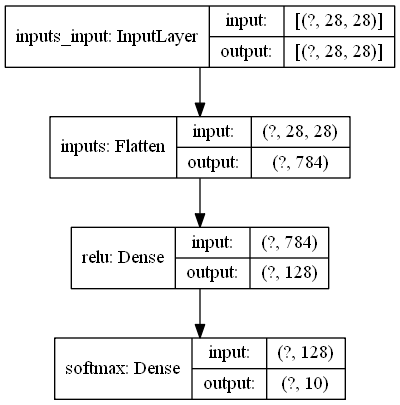

In [75]:
tf.keras.utils.plot_model(model, to_file='Sequetial.png', show_shapes=True)

Model: "Sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (Flatten)             (None, 784)               0         
_________________________________________________________________
relu (Dense)                 (None, 128)               100480    
_________________________________________________________________
softmax (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


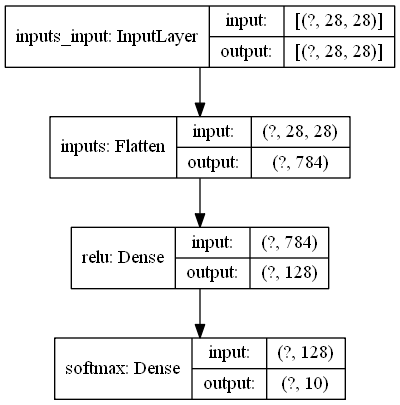

In [76]:
print(model.summary())
from tensorflow.keras.utils import plot_model
plot_model(
    model,
    show_shapes=True,
)